In [1]:
from aigyminsper.search.SearchAlgorithms import BuscaLargura
from aigyminsper.search.SearchAlgorithms import BuscaProfundidade
from aigyminsper.search.SearchAlgorithms import BuscaProfundidadeIterativa
from aigyminsper.search.Graph import State
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
class SumOne(State):

    def __init__(self, n, op, g):
        self.operator = op
        self.number = n
        self.goal = g

    def sucessors(self):
        sucessors = []
        if self.number < self.goal:
            sucessors.append(SumOne(self.number+1, "+1 ", self.goal))
            sucessors.append(SumOne(self.number+2, "+2 ", self.goal))
        return sucessors

    def is_goal(self):
        if self.goal == self.number:
            return True
        return False

    def description(self):
        return "Este é um agente simples que sabe somar 1 e 2"

    def cost(self):
        return 1

    def env(self):
        return self.number

In [3]:
def main(objetivo, algoritmo):
    print(f'Objetivo: {objetivo}')
    state = SumOne(1, '', objetivo)
    if algoritmo == "busca largura":
        algorithm = BuscaLargura()
    else:
        print("Algoritmo não encontrado")
        return None
    start_time = datetime.now()
    result = algorithm.search(state)
    end_time = datetime.now()
    tempo_processamento = (end_time - start_time).microseconds
    print(f'Tempo de processamento = {end_time - start_time}')
    if result != None:
        print('Achou a solução!')
        print(result.show_path())
    else:
        print('Nao achou solução')

    return tempo_processamento

df_largura = pd.DataFrame(columns=['Objetivo','Algoritmo', 'Tempo de Processamento'])
algoritmos = ["busca largura"]

for i in range(len(algoritmos)):
    for j in range(1,51):
        tempo = main(j, algoritmos[i])
        df_largura.loc[len(df_largura)] = [j, algoritmos[i], tempo]

Objetivo: 1
Tempo de processamento = 0:00:00.000007
Achou a solução!

Objetivo: 2
Tempo de processamento = 0:00:00.000008
Achou a solução!
 ; +1 
Objetivo: 3
Tempo de processamento = 0:00:00.000008
Achou a solução!
 ; +2 
Objetivo: 4
Tempo de processamento = 0:00:00.000010
Achou a solução!
 ; +1  ; +2 
Objetivo: 5
Tempo de processamento = 0:00:00.000013
Achou a solução!
 ; +2  ; +2 
Objetivo: 6
Tempo de processamento = 0:00:00.000019
Achou a solução!
 ; +1  ; +2  ; +2 
Objetivo: 7
Tempo de processamento = 0:00:00.000025
Achou a solução!
 ; +2  ; +2  ; +2 
Objetivo: 8
Tempo de processamento = 0:00:00.000040
Achou a solução!
 ; +1  ; +2  ; +2  ; +2 
Objetivo: 9
Tempo de processamento = 0:00:00.000051
Achou a solução!
 ; +2  ; +2  ; +2  ; +2 
Objetivo: 10
Tempo de processamento = 0:00:00.000099
Achou a solução!
 ; +1  ; +2  ; +2  ; +2  ; +2 
Objetivo: 11
Tempo de processamento = 0:00:00.000104
Achou a solução!
 ; +2  ; +2  ; +2  ; +2  ; +2 
Objetivo: 12
Tempo de processamento = 0:00:00.00

In [4]:
df_largura

,Objetivo,Algoritmo,Tempo de Processamento
0,1,busca largura,7
1,2,busca largura,8
2,3,busca largura,8
3,4,busca largura,10
4,5,busca largura,13
5,6,busca largura,19
6,7,busca largura,25
7,8,busca largura,40
8,9,busca largura,51
9,10,busca largura,99


In [5]:
def main(objetivo, algoritmo):
    print(f'Objetivo: {objetivo}')
    state = SumOne(1, '', objetivo)
    m = 10
    if algoritmo == "busca profundidade":
        algorithm = BuscaProfundidade()
    else:
        print("Algoritmo não encontrado")
        return None
    start_time = datetime.now()
    result = algorithm.search(state, m)
    end_time = datetime.now()
    tempo_processamento = (end_time - start_time).microseconds
    print(f'Tempo de processamento = {end_time - start_time}')
    if result != None:
        print('Achou a solução!')
        print(result.show_path())
    else:
        print('Nao achou solução')

    return tempo_processamento

df_profundidade = pd.DataFrame(columns=['Objetivo','Algoritmo', 'Tempo de Processamento'])
algoritmos = ["busca profundidade"]

for i in range(len(algoritmos)):
    for j in range(1,51):
        tempo = main(j, algoritmos[i])
        df_profundidade.loc[len(df_profundidade)] = [j, algoritmos[i], tempo]

Objetivo: 1
Tempo de processamento = 0:00:00.000007
Achou a solução!

Objetivo: 2
Tempo de processamento = 0:00:00.000007
Achou a solução!
 ; +1 
Objetivo: 3
Tempo de processamento = 0:00:00.000005
Achou a solução!
 ; +2 
Objetivo: 4
Tempo de processamento = 0:00:00.000008
Achou a solução!
 ; +2  ; +1 
Objetivo: 5
Tempo de processamento = 0:00:00.000008
Achou a solução!
 ; +2  ; +2 
Objetivo: 6
Tempo de processamento = 0:00:00.000011
Achou a solução!
 ; +2  ; +2  ; +1 
Objetivo: 7
Tempo de processamento = 0:00:00.000010
Achou a solução!
 ; +2  ; +2  ; +2 
Objetivo: 8
Tempo de processamento = 0:00:00.000012
Achou a solução!
 ; +2  ; +2  ; +2  ; +1 
Objetivo: 9
Tempo de processamento = 0:00:00.000010
Achou a solução!
 ; +2  ; +2  ; +2  ; +2 
Objetivo: 10
Tempo de processamento = 0:00:00.000013
Achou a solução!
 ; +2  ; +2  ; +2  ; +2  ; +1 
Objetivo: 11
Tempo de processamento = 0:00:00.000012
Achou a solução!
 ; +2  ; +2  ; +2  ; +2  ; +2 
Objetivo: 12
Tempo de processamento = 0:00:00.00

In [6]:
df_profundidade

,Objetivo,Algoritmo,Tempo de Processamento
0,1,busca profundidade,7
1,2,busca profundidade,7
2,3,busca profundidade,5
3,4,busca profundidade,8
4,5,busca profundidade,8
5,6,busca profundidade,11
6,7,busca profundidade,10
7,8,busca profundidade,12
8,9,busca profundidade,10
9,10,busca profundidade,13


In [7]:
def main(objetivo, algoritmo):
    print(f'Objetivo: {objetivo}')
    state = SumOne(1, '', objetivo)
    m = 100
    if algoritmo == "busca profundidade":
        algorithm = BuscaProfundidade()
    else:
        print("Algoritmo não encontrado")
        return None
    start_time = datetime.now()
    result = algorithm.search(state, m)
    end_time = datetime.now()
    tempo_processamento = (end_time - start_time).microseconds
    print(f'Tempo de processamento = {end_time - start_time}')
    if result != None:
        print('Achou a solução!')
        print(result.show_path())
    else:
        print('Nao achou solução')

    return tempo_processamento

df_profundidade_100 = pd.DataFrame(columns=['Objetivo','Algoritmo', 'Tempo de Processamento'])
algoritmos = ["busca profundidade"]

for i in range(len(algoritmos)):
    for j in range(1,51):
        tempo = main(j, algoritmos[i])
        df_profundidade_100.loc[len(df_profundidade_100)] = [j, algoritmos[i], tempo]

Objetivo: 1
Tempo de processamento = 0:00:00.000005
Achou a solução!

Objetivo: 2
Tempo de processamento = 0:00:00.000006
Achou a solução!
 ; +1 
Objetivo: 3
Tempo de processamento = 0:00:00.000007
Achou a solução!
 ; +2 
Objetivo: 4
Tempo de processamento = 0:00:00.000007
Achou a solução!
 ; +2  ; +1 
Objetivo: 5
Tempo de processamento = 0:00:00.000008
Achou a solução!
 ; +2  ; +2 
Objetivo: 6
Tempo de processamento = 0:00:00.000009
Achou a solução!
 ; +2  ; +2  ; +1 
Objetivo: 7
Tempo de processamento = 0:00:00.000009
Achou a solução!
 ; +2  ; +2  ; +2 
Objetivo: 8
Tempo de processamento = 0:00:00.000011
Achou a solução!
 ; +2  ; +2  ; +2  ; +1 
Objetivo: 9
Tempo de processamento = 0:00:00.000010
Achou a solução!
 ; +2  ; +2  ; +2  ; +2 
Objetivo: 10
Tempo de processamento = 0:00:00.000012
Achou a solução!
 ; +2  ; +2  ; +2  ; +2  ; +1 
Objetivo: 11
Tempo de processamento = 0:00:00.000011
Achou a solução!
 ; +2  ; +2  ; +2  ; +2  ; +2 
Objetivo: 12
Tempo de processamento = 0:00:00.00

In [8]:
df_profundidade_100

,Objetivo,Algoritmo,Tempo de Processamento
0,1,busca profundidade,5
1,2,busca profundidade,6
2,3,busca profundidade,7
3,4,busca profundidade,7
4,5,busca profundidade,8
5,6,busca profundidade,9
6,7,busca profundidade,9
7,8,busca profundidade,11
8,9,busca profundidade,10
9,10,busca profundidade,12


In [9]:
def main(objetivo, algoritmo):
    print(f'Objetivo: {objetivo}')
    state = SumOne(1, '', objetivo)
    
    if algoritmo == "busca profundidade iterativa":
        algorithm = BuscaProfundidadeIterativa()
    else:
        print("Algoritmo não encontrado")
        return None
    start_time = datetime.now()
    result = algorithm.search(state)
    end_time = datetime.now()
    tempo_processamento = (end_time - start_time).microseconds
    print(f'Tempo de processamento = {end_time - start_time}')
    if result != None:
        print('Achou a solução!')
        print(result.show_path())
    else:
        print('Nao achou solução')

    return tempo_processamento

df_iterativa = pd.DataFrame(columns=['Objetivo','Algoritmo', 'Tempo de Processamento'])
algoritmos = ["busca profundidade iterativa"]

for i in range(len(algoritmos)):
    for j in range(1,51):
        tempo = main(j, algoritmos[i])
        df_iterativa.loc[len(df_iterativa)] = [j, algoritmos[i], tempo]

Objetivo: 1
Tempo de processamento = 0:00:00.000006
Achou a solução!

Objetivo: 2
Tempo de processamento = 0:00:00.000006
Achou a solução!
 ; +1 
Objetivo: 3
Tempo de processamento = 0:00:00.000008
Achou a solução!
 ; +2 
Objetivo: 4
Tempo de processamento = 0:00:00.000012
Achou a solução!
 ; +2  ; +1 
Objetivo: 5
Tempo de processamento = 0:00:00.000011
Achou a solução!
 ; +2  ; +2 
Objetivo: 6
Tempo de processamento = 0:00:00.000019
Achou a solução!
 ; +2  ; +2  ; +1 
Objetivo: 7
Tempo de processamento = 0:00:00.000018
Achou a solução!
 ; +2  ; +2  ; +2 
Objetivo: 8
Tempo de processamento = 0:00:00.000034
Achou a solução!
 ; +2  ; +2  ; +2  ; +1 
Objetivo: 9
Tempo de processamento = 0:00:00.000035
Achou a solução!
 ; +2  ; +2  ; +2  ; +2 
Objetivo: 10
Tempo de processamento = 0:00:00.000065
Achou a solução!
 ; +2  ; +2  ; +2  ; +2  ; +1 
Objetivo: 11
Tempo de processamento = 0:00:00.000064
Achou a solução!
 ; +2  ; +2  ; +2  ; +2  ; +2 
Objetivo: 12
Tempo de processamento = 0:00:00.00

In [20]:
df_iterativa

,Objetivo,Algoritmo,Tempo de Processamento
0,1,busca profundidade iterativa,6
1,2,busca profundidade iterativa,6
2,3,busca profundidade iterativa,8
3,4,busca profundidade iterativa,12
4,5,busca profundidade iterativa,11
5,6,busca profundidade iterativa,19
6,7,busca profundidade iterativa,18
7,8,busca profundidade iterativa,34
8,9,busca profundidade iterativa,35
9,10,busca profundidade iterativa,65


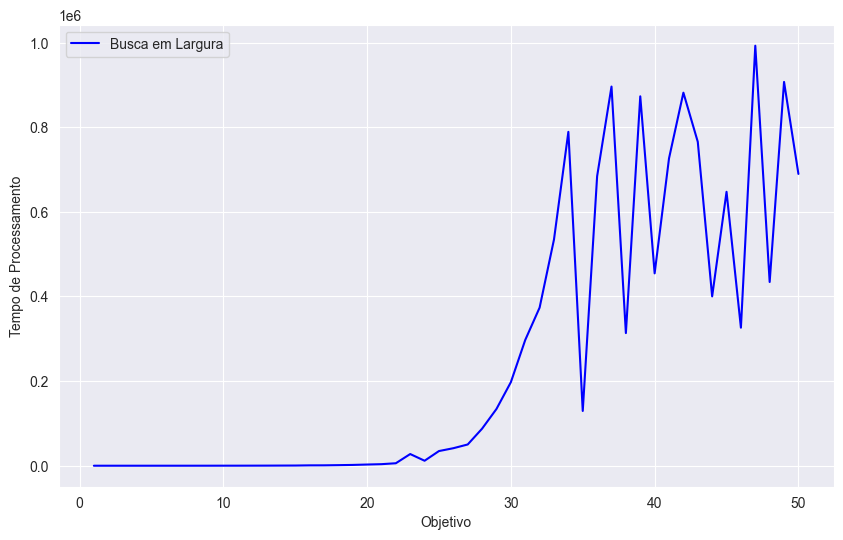

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(df_largura['Objetivo'], df_largura['Tempo de Processamento'], label='Busca em Largura', color='blue')
plt.xlabel('Objetivo')
plt.ylabel('Tempo de Processamento')
plt.legend()
plt.show()

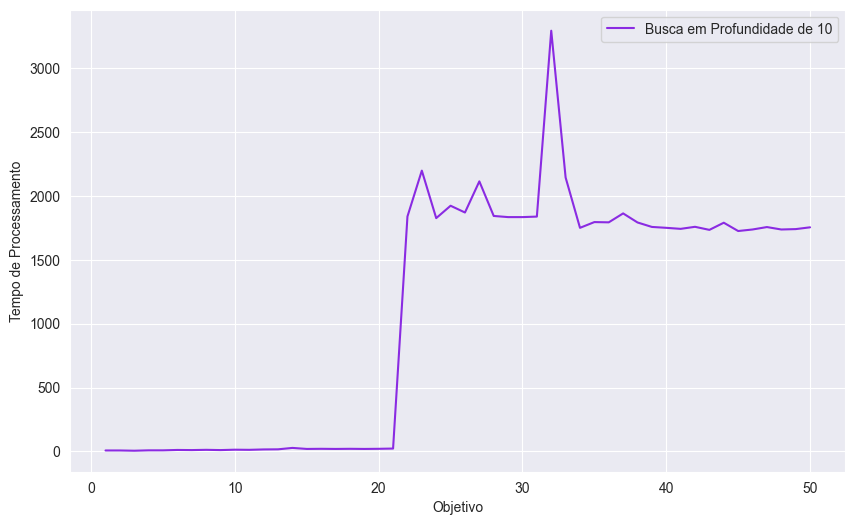

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(df_profundidade['Objetivo'], df_profundidade['Tempo de Processamento'], label='Busca em Profundidade de 10',color = 'blueviolet')
plt.xlabel('Objetivo')
plt.ylabel('Tempo de Processamento')
plt.legend()
plt.show()

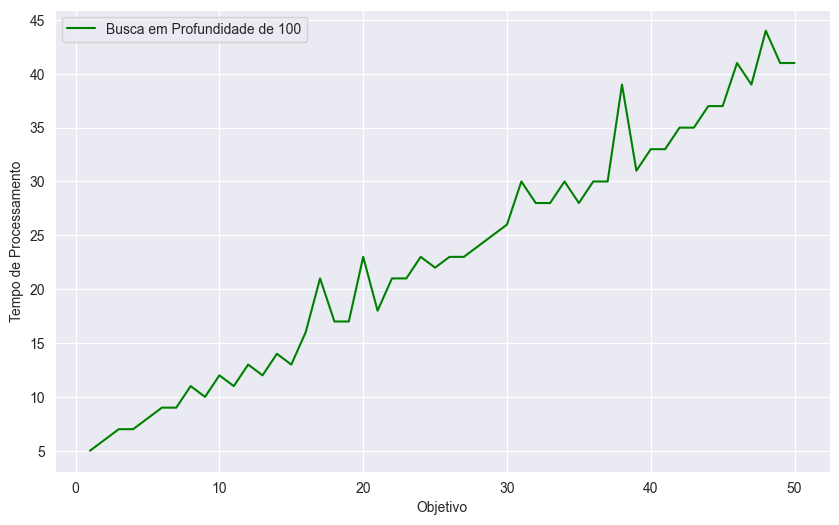

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(df_profundidade_100['Objetivo'], df_profundidade_100['Tempo de Processamento'], label='Busca em Profundidade de 100', color= 'green')
plt.xlabel('Objetivo')
plt.ylabel('Tempo de Processamento')
plt.legend()
plt.show()

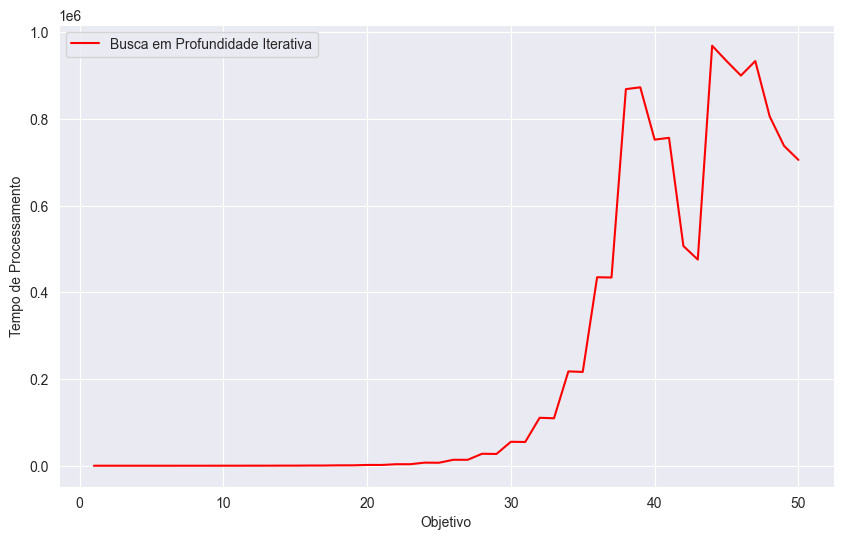

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(df_iterativa['Objetivo'], df_iterativa['Tempo de Processamento'], label='Busca em Profundidade Iterativa', color= 'red')
plt.xlabel('Objetivo')
plt.ylabel('Tempo de Processamento')
plt.legend()
plt.show()

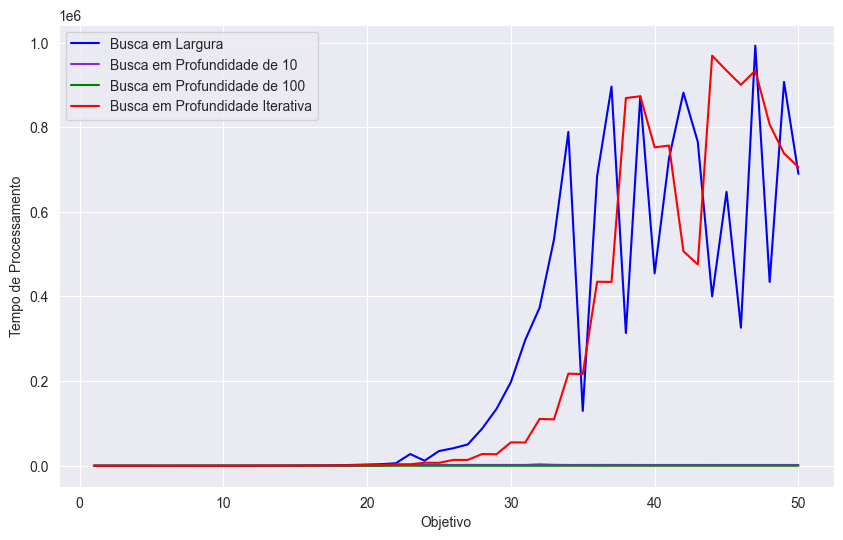

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(df_largura['Objetivo'], df_largura['Tempo de Processamento'], label='Busca em Largura', color='blue')
plt.plot(df_profundidade['Objetivo'], df_profundidade['Tempo de Processamento'], label='Busca em Profundidade de 10',color = 'blueviolet')
plt.plot(df_profundidade_100['Objetivo'], df_profundidade_100['Tempo de Processamento'], label='Busca em Profundidade de 100', color= 'green')
plt.plot(df_iterativa['Objetivo'], df_iterativa['Tempo de Processamento'], label='Busca em Profundidade Iterativa', color= 'red')
plt.xlabel('Objetivo')
plt.ylabel('Tempo de Processamento')
plt.legend()
plt.show()

# Atividade 1
#### Segundo o que discutimos em sala de aula, quais destes algoritmos são ótimos? Os resultado encontrados neste exercício são coerentes com está informação? Justifique a sua resposta.

Os algoritmos de busca em profundidade e profundidade iterativa sào ótimos, porque eles garantem a solução dos problemas com menos interações. Ao contrário do algoritmo de busca em largura, que não garante a solução ótima, pois ele pode demorar muito tempo para encontrar a solução do problema, e pode não encontrar a solução do problema, caso o número de iterações seja muito grande.


#### Segundo o que discutimos em sala de aula, quais destes algoritmos são completos? Os resultado encontrados neste exercício são coerentes com está informação? Justifique a sua resposta. 

O algoritimo de largura classifica-se como completo garantindo a solução do problema, mas não garantindo uma solução ótima, porque leva muito mais tempo e iterações do que os outros algoritmos na resolução do problema.


#### Teve algum algoritmo que travou por falta de memória no seu computador? Se sim, qual é a explicação?

Não teve nenhum algoritimo que chegou a travar.


#### Qual é o algoritmo que tem um tempo de processamento menor? Justifique a sua resposta.


O algoritimo o busca profundidade, porque ele utiliza menos recurso computacional, fazendo com que sua solução seja encontrada em menos tempo, tendo em vista que foi definido um "m" de 10 a 100.